# In this project our aim is to detect whether the credit card transaction is fraud or Normal


## Exploring the data

In [343]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sb

In [344]:
#Read the data
data_full=pd.read_csv("creditcard.csv")
print(data_full.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [345]:
data_full.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Out of 31 columns name of 28 columns are hided because it contain some personal details of person having transactions

In [346]:
print(data_full.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [347]:
data_full.shape

(284807, 31)

## Preparing The Data


This data contain lakhs of transaction, Doing algorithm on such a huge data will be time taking, lets take 10% of this data

In [348]:
data=data_full.sample(frac=0.1, random_state=0)

In [349]:
data.shape

(28481, 31)

In [350]:
# Class is what we need to predict i.e. whether tranasaction is fraud labelled as 1 or normal labelled as 0 and stored this in 'output' variable
output=data["Class"]
# Drop class column
df=data.drop("Class",axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C8A321048>,
      dtype=object)

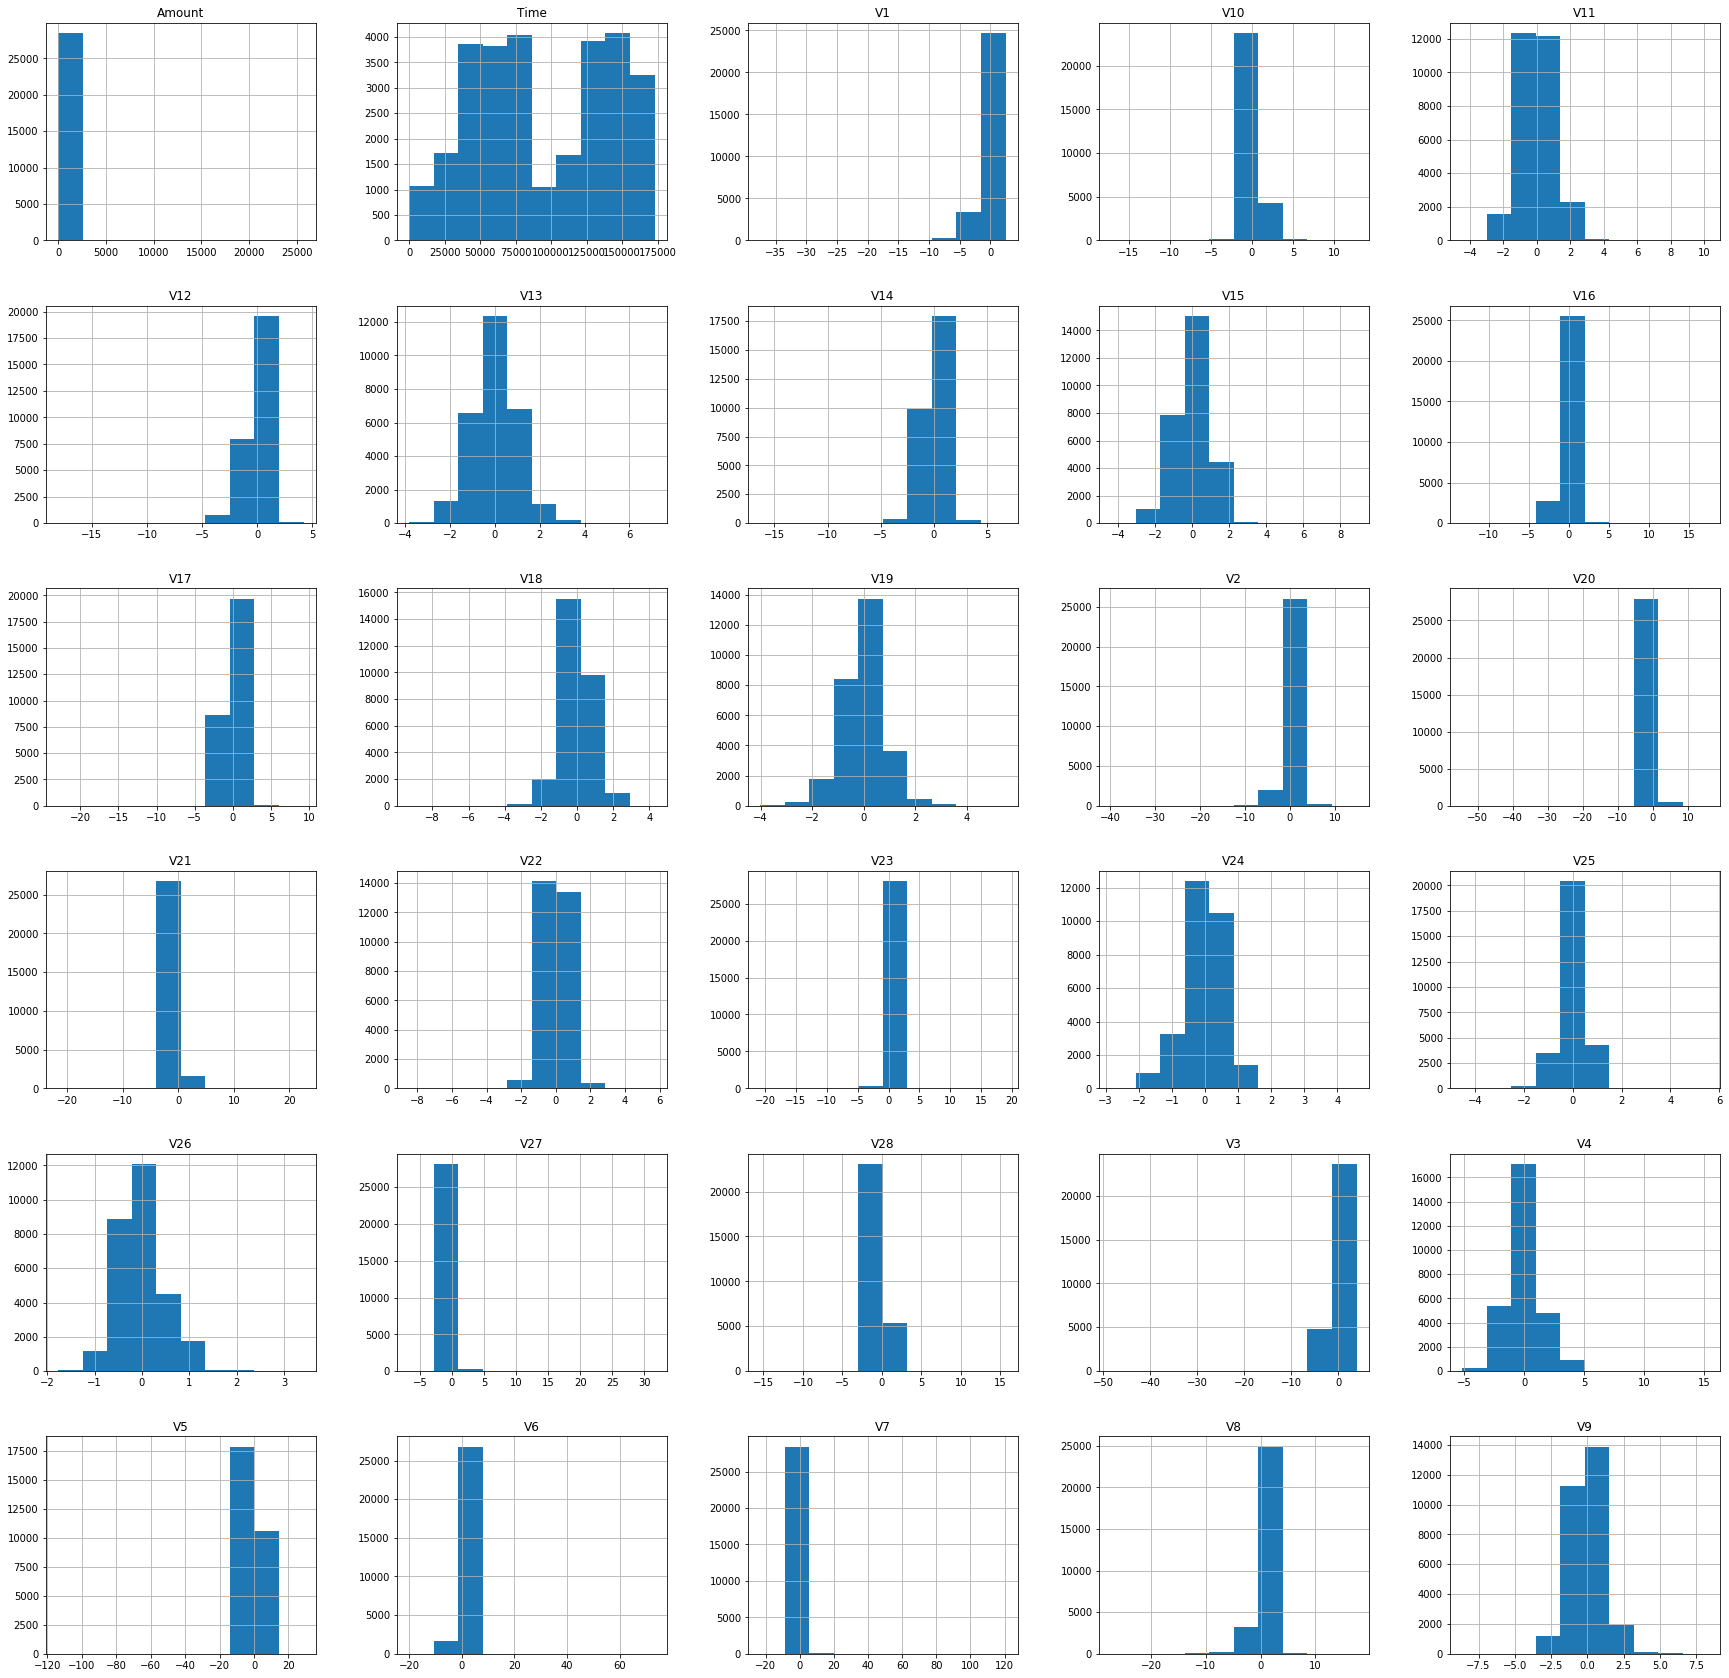

In [351]:
#Checking the skewness of columns by visualising through histogram
df.hist(figsize=(30,30))


## Normalising Numerical Features of Data

In [352]:
scaler = MinMaxScaler() # default=(0, 1)
columns = df.columns
df[columns]=scaler.fit_transform(df[columns])

In [353]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [354]:
# look at the data after all pre-processing steps
print(df.describe())

               Time            V1            V2            V3            V4  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.547609      0.938297      0.728597      0.925471      0.252443   
std        0.274618      0.049328      0.029942      0.029528      0.069036   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.312970      0.915728      0.717455      0.908733      0.211006   
50%        0.489541      0.938642      0.729857      0.929153      0.251271   
75%        0.804838      0.971380      0.743315      0.945071      0.288710   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.798242      0.214403      0.161236      0.608907      0.510398   
std        0.010597      0.014847      0.009561    

## Shuffle and Split Data

In [355]:

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    output,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 22784 samples.
Testing set has 5697 samples.


## Before Applying Model Evaluation lets first check accuracy without any model implementation and considering all cases are detected as normal

In [356]:
fraud_cases=np.sum(data['Class']==1)
print(fraud_cases)

55


In [357]:
True_outcomes=data.shape[0]-fraud_cases
accuracy=True_outcomes/data.shape[0]
print(accuracy)

0.9980688880306169


## It can be seen that without even detecting any fraud accuracy is  high hence accuracy is not a good parameter. By model evaluation Higer precision, Higher recall and higher f-beta score must be achieved

## Evaluating Model Performance

In [358]:
# beta value taken is higer as higher recall is the requirement of data
def train_predict(learner,X_train, y_train, X_test, y_test):
    results={}
    start=time()
    learner = learner.fit(X_train,y_train)
    end = time()
    results['train_time'] = end-start
    start = time() # Get start time
    predictions_train=learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    end = time() 
    results['prediction_time']=end-start
    results['train_accuracy'] = accuracy_score(y_train,predictions_train)
    results['train_precision'] = precision_score(y_train,predictions_train)
    results['train_recall'] = recall_score(y_train,predictions_train)
    results['test_accuracy'] = accuracy_score(y_test,predictions_test)
    results['test_precision'] = precision_score(y_test,predictions_test)
    results['test_recall'] = recall_score(y_test,predictions_test)
    
    results['f_score']=fbeta_score(y_test,predictions_test, beta=0.5)
    return results

## Implementation: Initial Model Evaluation

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
model_A = RandomForestClassifier()
model_B = GaussianNB()
model_C = SVC()
print("RandomForestClassifier",train_predict(model_A,X_train, y_train, X_test, y_test))
print("GaussianNB",train_predict(model_B,X_train, y_train, X_test, y_test))
print("SVC",train_predict(model_C,X_train, y_train, X_test, y_test))


RandomForestClassifier {'train_time': 10.056101322174072, 'prediction_time': 0.34308290481567383, 'train_accuracy': 1.0, 'train_precision': 1.0, 'train_recall': 1.0, 'test_accuracy': 0.9996489380375636, 'test_precision': 0.8571428571428571, 'test_recall': 0.8571428571428571, 'f_score': 0.8571428571428571}
GaussianNB {'train_time': 0.024931669235229492, 'prediction_time': 0.04488062858581543, 'train_accuracy': 0.9816537921348315, 'train_precision': 0.09429824561403509, 'train_recall': 0.8958333333333334, 'test_accuracy': 0.9836756187467088, 'test_precision': 0.061224489795918366, 'test_recall': 0.8571428571428571, 'f_score': 0.07518796992481203}
SVC {'train_time': 0.20544838905334473, 'prediction_time': 0.13962697982788086, 'train_accuracy': 0.9994294241573034, 'train_precision': 0.926829268292683, 'train_recall': 0.7916666666666666, 'test_accuracy': 0.9994734070563455, 'test_precision': 0.75, 'test_recall': 0.8571428571428571, 'f_score': 0.7692307692307692}


## Choosing The best Model

Out of Above three models,It can be concluded that GaussianNB is worst to use as it gives lowest precision while Random forest takes too much time but all scores associated with it are same as of SVC, So lets apply model tuning in both

## Implementation: Model Tuning

Model tuning using Grid search on RandomForest Classifier

In [360]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,5,10,20,50],'max_depth':[2,5,10]}
from sklearn.metrics import make_scorer
scorer=make_scorer(fbeta_score,beta=0.5)
grid_obj_rand=GridSearchCV(RandomForestClassifier(),param_grid=parameters,scoring=scorer)
grid_fit=grid_obj.fit(X_train,y_train)
best_clf=grid_fit.best_estimator_
print(best_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [361]:
print(train_predict(best_clf,X_train, y_train, X_test, y_test))

{'train_time': 4.886929035186768, 'prediction_time': 0.15657973289489746, 'train_accuracy': 0.9999122191011236, 'train_precision': 1.0, 'train_recall': 0.9583333333333334, 'test_accuracy': 0.9994734070563455, 'test_precision': 0.75, 'test_recall': 0.8571428571428571, 'f_score': 0.7692307692307692}


Model tuning using Grid search on SVC

In [362]:
paramteres_svc={'kernel':['poly','rbf'],'C':[0.1,1,10,100]}
grid_obj_svc=GridSearchCV(SVC(),paramteres_svc,scoring=scorer)
grid_fit_svc=grid_obj_svc.fit(X_train,y_train)
best_clf_svc=grid_fit_svc.best_estimator_
print(best_clf_svc)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [363]:
print(train_predict(best_clf_svc,X_train, y_train, X_test, y_test))

{'train_time': 0.36553192138671875, 'prediction_time': 0.1545870304107666, 'train_accuracy': 0.999780547752809, 'train_precision': 1.0, 'train_recall': 0.8958333333333334, 'test_accuracy': 0.9994734070563455, 'test_precision': 0.75, 'test_recall': 0.8571428571428571, 'f_score': 0.7692307692307692}


From above two results it can ve concluded that results are same even after applying model tuning with both the model SVC and RandomForest, But since time taken by SVC is lesser, So best model selected here is SVC.

## Conclusion: SVC Model is best to use for data with test_precision of 0.75, test_recall of 0.8571 and f_score of 0.769

## Data Analysis 

As This data doesnt tell much about columns, lets analysis with respect to amount and time columns

## Analysis for amount

Lets plot a violinplot to understand threshold value of area_se which predict Belign and Malignant cancer

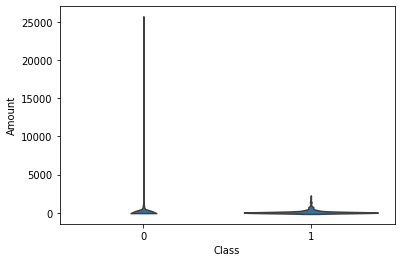

In [364]:
sb.violinplot(data=data_full,x=data_full['Class'],y=data_full["Amount"],inner=None, color=sb.color_palette()[0])

In [365]:
np.sum(data_full['Amount']>=2200)

569

In [366]:
np.sum((data_full['Amount']>=2200) & (data_full['Class']==1))

0

## From above result it can be concluded that whenever Amount is greater than 2200, Transaction is not fraud

## Analysis for Time

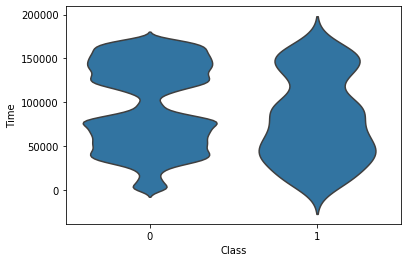

In [367]:
sb.violinplot(data=data_full,x=data_full['Class'],y=data_full["Time"],inner=None, color=sb.color_palette()[0])

In [342]:
np.sum(data_full['Time']>=170500)

2912

In [368]:
np.sum((data_full['Time']>=170500) & (data_full['Class']==1))

0

## From above result it can be concluded that whenever transaction time is greater than 170500, there is no possiblity of fraud case. There are 2912 people who took time greater than 170500. Time gives better conclusion than Amount